Accuracy: 0.9293103448275862
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       278
           1       0.94      0.92      0.93       302

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



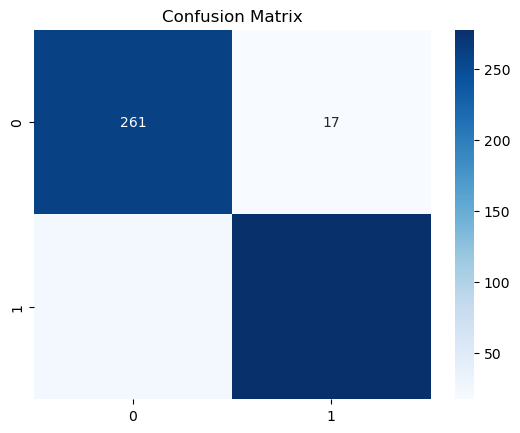

['scaler.pkl']

In [1]:
# personality_model.ipynb (Jupyter Notebook to train & export model)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import joblib

# Load data
df = pd.read_csv('/Users/yashsmacbook/Downloads/personality_dataset.csv')

# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)
df['Stage_fear'] = df['Stage_fear'].fillna(df['Stage_fear'].mode()[0])
df['Drained_after_socializing'] = df['Drained_after_socializing'].fillna(df['Drained_after_socializing'].mode()[0])

# Encode categorical
binary_map = {'Yes': 1, 'No': 0}
df['Stage_fear'] = df['Stage_fear'].map(binary_map)
df['Drained_after_socializing'] = df['Drained_after_socializing'].map(binary_map)
df['Personality'] = df['Personality'].map({'Extrovert': 1, 'Introvert': 0})

# Optional: Concatenate feedback if present
import os
if os.path.exists("feedback.csv"):
    feedback_df = pd.read_csv("feedback.csv")
    df = pd.concat([df, feedback_df], ignore_index=True)

# Train/Test Split
X = df.drop("Personality", axis=1)
y = df["Personality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost with balanced weighting
xgb_model = XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight=1.2,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = xgb_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Export model & scaler
joblib.dump(xgb_model, "xgb_model.pkl")
joblib.dump(scaler, "scaler.pkl")